# Santander Customer Transaction Prediction - Random Forest Details

In the Kaggle competition, the objective is to identify which customer will make a transaction in the future.

**Link to the competition**: https://www.kaggle.com/c/santander-customer-transaction-prediction/  
**Type of Problem**: Classification  
**Metric for evalution**: AOC (Area Under Curve)

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


## Step1: Read CSV
Read the train csv file and look at the data. There are 200K rows and 200 independent variables.

In [3]:
input_dir = '/kaggle/input/santander-customer-transaction-prediction/'
df_train = pd.read_csv(input_dir + 'train.csv')
df_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


Split the data into independent and dependent variables. This is required to train the model using sklearn.

In [4]:
var_columns = [c for c in df_train if c not in ['ID_code','target']]
X = df_train.loc[:,var_columns]
y = df_train.loc[:,'target']

## Step2: Create Random Forest Model
Use the parameters which are result of hyperparameter tuning

In [5]:
model_rf = RandomForestClassifier(class_weight='balanced',
                                  criterion='gini',
                                  max_depth=55,
                                  max_features='log2',
                                  min_samples_leaf=0.005,
                                  min_samples_split=0.005,
                                  n_estimators=190)
model_rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=55,
                       max_features='log2', min_samples_leaf=0.005,
                       min_samples_split=0.005, n_estimators=190)

## Step3: Variable Importance
Convert the variable importance into pandas dataframe. Also sort the variable list based on importance.

In [6]:
df_var_imp = pd.DataFrame({'Variable': var_columns,
                           'Importance': model_rf.feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

Let us plot the variable importance as bar charts.

<AxesSubplot:ylabel='Variable'>

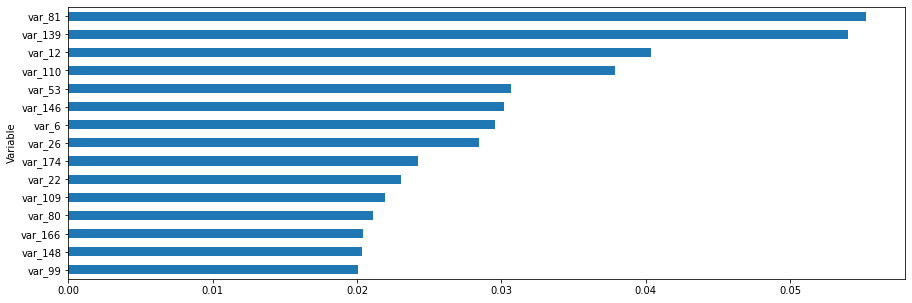

In [7]:
df_var_imp[:15].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,5), legend=False)

## Step4: Partial Dependence of Variables
`var_81`, `var_139` and `var_110` are the top variables on the basis of variable importance. Let us see how they relate to the dependent variable.

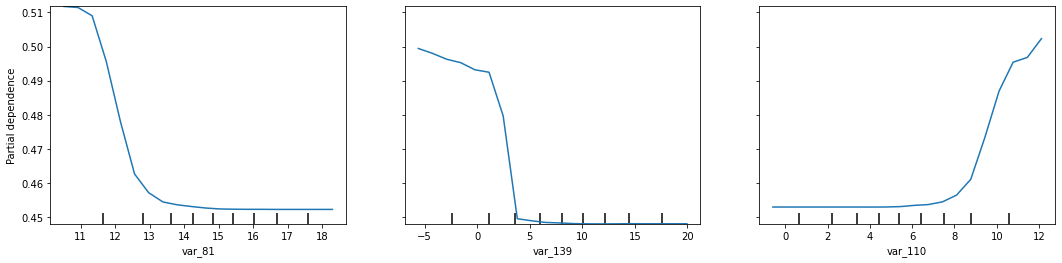

In [8]:
fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(model_rf, X, ['var_81','var_139','var_110'],
                        grid_resolution=20, ax=ax);

For `var_81` and `var_139` , we can see that event rate is higher for lower values of the variable. For `var_110`, higher values leads to higher event rate. Also, seems like there can be a cut-off value which can be used for classification.  

Let us also see the distribution of data as histogram for the three variables.

<AxesSubplot:>

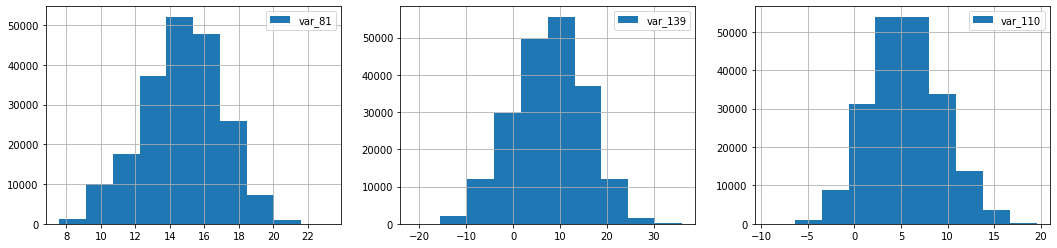

In [9]:
fig,ax = plt.subplots(1, 3, figsize=(18, 4))
X['var_81'].hist(ax=ax[0], legend=True)
X['var_139'].hist(ax=ax[1], legend=True)
X['var_110'].hist(ax=ax[2], legend=True)

## Step5: Prediction on Test Data
Read the test and sample submission csv

In [10]:
df_test = pd.read_csv(input_dir + '/test.csv')
df_sample_submission = pd.read_csv(input_dir + '/sample_submission.csv')

df_test.shape, df_sample_submission.shape

((200000, 201), (200000, 2))

Split the test data between independent variables and find predictions

In [11]:
X_test = df_test.loc[:,var_columns]

df_sample_submission['target'] = model_rf.predict_proba(X_test)[:,1]
df_sample_submission

,ID_code,target
0,test_0,0.546804
1,test_1,0.530118
2,test_2,0.522565
3,test_3,0.483014
4,test_4,0.447396
...,...,...
199995,test_199995,0.412444
199996,test_199996,0.358205
199997,test_199997,0.349574
199998,test_199998,0.514068


## Step6: Confidence of prediction
While probability of prediction can be used to identify how confident we are about predictions for an observation, another way is to use standard deviation of predictions from different trees in the random forest.

In [12]:
y_test_pred_trees = np.stack([m.predict(X_test) for m in model_rf.estimators_])
y_test_pred_trees.shape

(190, 200000)

In [13]:
y_test_pred_std = y_test_pred_trees.std(0)

df_sample_submission['pred_prob'] = model_rf.predict_proba(X_test)[:,1]
df_sample_submission['pred_std'] = y_test_pred_std
df_sample_submission[:10]

,ID_code,target,pred_prob,pred_std
0,test_0,0.546804,0.546804,0.472630
1,test_1,0.530118,0.530118,0.485125
2,test_2,0.522565,0.522565,0.489898
3,test_3,0.483014,0.483014,0.499889
4,test_4,0.447396,0.447396,0.491929
5,test_5,0.369839,0.369839,0.403894
6,test_6,0.413548,0.413548,0.468864
7,test_7,0.490190,0.490190,0.495296
8,test_8,0.323379,0.323379,0.354473
9,test_9,0.371708,0.371708,0.431483


## Step7: Export Predictions

In [14]:
output_dir = '/kaggle/working/'
df_sample_submission[['ID_code','target']].to_csv(output_dir + '02_random_forest_scores.csv', index=False)